# Set up, data, dataframe creation

In [400]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from sympy.plotting import plot, plot_parametric

%matplotlib inline


#Set working directory 
os.chdir('C:\\Users\\user\\Desktop\\Summer 2020\\Research Assistant\\Sandra\\Work\\Data')
os.getcwd()


'C:\\Users\\user\\Desktop\\Summer 2020\\Research Assistant\\Sandra\\Work\\Data'

In [401]:
#scraped data
headlines_df = pd.read_csv('express.csv', index_col = 'date')

daily_mail_df = pd.read_excel('daily_mail_after_filters.xlsx', index_col = 'date')
evening_standard_df = pd.read_excel('evening_standard_after_filters.xlsx', index_col = 'date')
express_df = pd.read_excel('express_after_filters.xlsx', index_col = 'date')
guardian_df = pd.read_excel('guardian_after_filters.xlsx', index_col = 'date')
independent_df = pd.read_excel('independent_after_filters.xlsx', index_col = 'date')
times_df = pd.read_excel('times_after_filters.xlsx', index_col = 'date')

#Concatenating all articles together
newspapers = [daily_mail_df, evening_standard_df, express_df, guardian_df, independent_df, times_df]
# Need for one-stage classification
articles_df = pd.concat(newspapers)
# Needed for two-stage classification
articles_df2 = pd.concat(newspapers)

#labeled data
bbc_df = pd.read_csv('News_dataset.csv', sep=';')
kaggle_df = pd.read_json (r'C:\\Users\\user\\Desktop\\Summer 2020\\Research Assistant\\Sandra\\Work\\Data\\News_Category_Dataset_v2.json', lines = True)

In [402]:
articles_df.head()

,headline,newspaper,author,page,text
date,,,,,
1-3-2015,Two-thirds of laws in Britain over the past tw...,Daily Mail,"Tamara Cohen, Political Correspondent for the ...",NaN,Study found 64.7 per cent of the laws made bet...
1-3-2015,Now Europe wants to ban your halogen light bul...,Daily Mail,"Sean Poulter, Consumer Affairs Editor For The ...",NaN,Follows ban of incandescent bulbs in bid to cu...
1-3-2015,Scott Walker admits flip-flop on illegal immig...,Daily Mail,Associated Press,NaN,Wisconsin governor once favored plan whereby u...
1-3-2015,"Don't blame immigrants for ills of society, sa...",Daily Mail,"Matt Chorley, Political Editor for MailOnline",NaN,"Letter to 500,000 parishes warns of blaming im..."
2-3-2015,Landmark EU ruling to cut plastic bag use by 8...,Daily Mail,Sean Poulter for the Daily Mail,NaN,EU decision is a victory for Daily Mail reader...


In [403]:
headlines_df.head()

,headline,newspaper
date,,
1-3-2015,Prince Andrew 'frozen out by Charles over dama...,Express
1-3-2015,EXCLUSIVE: Migrants to put Britain's populatio...,Express
1-3-2015,EXCLUSIVE: Jihadi John exposed by web error: K...,Express
1-3-2015,Missing Becky Watts: Two arrested as family ad...,Express
1-3-2015,We can all benefit from a positive approach to...,Express


In [404]:
bbc_df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


In [405]:
#Slice the df to have only Green and environment articles
green_df = kaggle_df[kaggle_df.category == 'GREEN']
env_df = kaggle_df[kaggle_df.category == 'ENVIRONMENT']


# Extracting Keywords

In [406]:
# Cleaning
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
nltk.download('wordnet')


def cleaning(df, column_str):
    '''function to clean a text within a column of a dataframe. The column name has to be a string'''
    #Special character
    df[column_str] = df[column_str].str.replace("\r", " ")
    df[column_str] = df[column_str].str.replace("\n", " ")
    df[column_str] = df[column_str].str.replace("    ", " ")
    df[column_str] = df[column_str].str.replace('"', '')

    #Lowercase
    df[column_str] = df[column_str].str.lower()

    #Punctuation
    punctuation_signs = list("?:!.,;-")

    for punct_sign in punctuation_signs:
        df[column_str] = df[column_str].str.replace(punct_sign, '')

    #Possessive pronouns
    df[column_str] = df[column_str].str.replace("'s", "")
    df[column_str] = df[column_str].str.replace("'", "")

    #Lemmatization
    # Saving the lemmatizer into an object
    wordnet_lemmatizer = WordNetLemmatizer()

    nrows = len(df)
    lemmatized_text_list = []

    for row in range(0, nrows):

        # Create an empty list containing lemmatized words
        lemmatized_list = []

        # Save the text and its words into an object
        text = df.iloc[row][column_str]
        text_words = text.split(" ")

        # Iterate through every word to lemmatize
        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

        # Join the list
        lemmatized_text = " ".join(lemmatized_list)

        # Append to the list containing the texts
        lemmatized_text_list.append(lemmatized_text)

    df[column_str] = lemmatized_text_list

    #Stopwords
    # Downloading the stop words list
    nltk.download('stopwords')
    # Loading the stop words in english
    stop_words = list(stopwords.words('english'))

    df[column_str] = df[column_str]

    for stop_word in stop_words:

        regex_stopword = r"\b" + stop_word + r"\b"
        df[column_str] = df[column_str].str.replace(regex_stopword, '')

    return df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [407]:
green_df = cleaning(green_df, 'headline')
bbc_df = cleaning(bbc_df, 'Content')
env_df = cleaning(env_df, 'headline')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [408]:
biz_df = bbc_df[bbc_df.Category == 'business']
pol_df = bbc_df[bbc_df.Category == 'politics']

In [409]:
#Most commonly used words extractor
def keywords_extractor(df, headline_str, n):
    '''Return the most commonly used words from a dataframe with a column containing text.
    Arguments are dataframe, the name of the column in string format, and the number n of keywords needed'''
    df_words = Counter()
    df[headline_str].str.split().apply(df_words.update)
    df_words = df_words.most_common(20)
    df_words_lst = []
    for tup in df_words:
        df_words_lst.append(tup[0])
    return df_words_lst

#Keywords list creation
biz_keywords = keywords_extractor(biz_df, 'Content', n = 20)
pol_keywords = keywords_extractor(pol_df, 'Content', n = 20)
green_keywords = keywords_extractor(green_df, 'headline', n = 20)
env_keywords = keywords_extractor(env_df, 'headline', n = 20)

In [411]:
#Combining green and env keywords
climate_keywords = []
climate_keywords.extend(green_keywords)
climate_keywords.extend(env_keywords)

#Eliminating duplicates
climate_keywords = list(set(climate_keywords))

#Removing not useful keywords
climate_keywords.remove('(photos)')
climate_keywords.remove('(video)')

#Including some additional important words
climate_keywords.extend(["climate change", "paris agreement", "environment", "global warming", "unfccc"])


In [412]:
british_keywords = ["brexit", "european union", " eu ", "british", "british identity", "british passport",
                    "british culture", "british heritage", "british goods", "british products","british manufacturing",
                    "made in britain"]
immigration_keywords = ['migrant', 'refugee', 'immigrant', 'asylum', 'Calais']

In [413]:
# Unique Keywords
def unique_keywords(keyword_list, other_keyword):
    result = []
    other = []
    for j in range(len(other_keyword)):
        other.extend(other_keyword[j])
    for i in range(len(keyword_list)):
        if keyword_list[i] not in other:
            result.append(keyword_list[i])
            
    return result

In [414]:
unique_biz_keywords = unique_keywords(biz_keywords, (british_keywords, climate_keywords, pol_keywords, immigration_keywords))
unique_british_keywords = unique_keywords(british_keywords, (climate_keywords, biz_keywords, pol_keywords, immigration_keywords))
unique_climate_keywords = unique_keywords(climate_keywords, (british_keywords, biz_keywords, pol_keywords, immigration_keywords))
unique_pol_keywords = unique_keywords(pol_keywords, (british_keywords, climate_keywords, biz_keywords, immigration_keywords))
unique_immigration_keywords =  unique_keywords(immigration_keywords, (british_keywords, climate_keywords, biz_keywords, pol_keywords))

In [415]:
british_keywords = unique_british_keywords
climate_keywords = unique_climate_keywords
biz_keywords = unique_biz_keywords
pol_keywords = unique_pol_keywords
immigration_keywords = unique_immigration_keywords

# Classification

In [416]:
#Defining the functions that need to be used 


def topic_classifier(string, keywords_tuple, name_class_tuple):
    '''Classifies a list of strings according to keywords lists presented inside a tuple.
    Also requires the names of the classes in string from in a second tuple'''
    string = string.lower()
    if len(keywords_tuple) == len(name_class_tuple) and len(keywords_tuple) > 0:
        no_of_classes = len(keywords_tuple)
        counts = []
        count = 0
        while no_of_classes > 0:
            no_of_classes -= 1
            for keyword in keywords_tuple[no_of_classes]:
                if keyword in string:
                    count += 1
            counts.insert(0, count)
            count = 0
    else:
        return "List of keywords do not match list of classes or the list of keywords is empty"
        
    if max(counts) > 0:
        max_list = max(counts)
        values = np.array(counts)
        ii = np.where(values==max_list)[0]
        results_temp = [name_class_tuple[index] for index in ii]
        sep = ","
        results = sep.join(results_temp)
        return results
    else:
        return 'Other'

    
def headline_classification(data, keywords_tuple, name_class_tuple):
    n_row, n_col = data.shape
    data_lst = list(data['headline'].values)

    #Headline classification
    classification_lst = []
    for i in range(n_row):
        data_i = str(data_lst[i]) #Include this becasue of potential nan values
        classification_lst.append(topic_classifier(data_i, keywords_tuple, name_class_tuple))
    return classification_lst

def text_classification(data, keywords_tuple, name_class_tuple):
    n_row, n_col = data.shape
    data_lst = list(data['text'].values)

    #Text classification
    classification_lst = []
    for i in range(n_row):
        data_i = str(data_lst[i]) #Include this becasue of potential nan values
        classification_lst.append(topic_classifier(data_i, keywords_tuple, name_class_tuple))
    return classification_lst

def sentiment_analysis (df, column_str):
    '''function needs a dataframe with a string column where to perfrom sentiment analysis
    provide the column name in string format'''
    n_row, n_col = df.shape
    headlines_lst = list(df[column_str].values)
    #Empty list to add the polarity score
    polarity_lst = []
    subjectivity_lst = []

    #Headline sentiment
    for i in range(n_row):
        headline_i = str(headlines_lst[i]) #Include this becasue of potential nan values
        blob_headline_i = TextBlob(headline_i) #transforming string into textblob
        polarity_lst.append(blob_headline_i.sentiment.polarity)
        subjectivity_lst.append(blob_headline_i.sentiment.subjectivity)

    #Adding polarity and subjectivity scores to the headlines dataframe
    df['polarity '+ column_str] = polarity_lst
    df['subjectivity '+ column_str] = subjectivity_lst
    return df

In [417]:
# One-Step Classification
# All articles first classification
#headline classification
articles_df['headline_classification'] = ''
head_class_lst = headline_classification(articles_df, key_tup, name_tup)
articles_df = articles_df.assign(headline_classification = head_class_lst)
#sentiment_analysis
sentiment_analysis(articles_df, 'headline')

#text classification
articles_df['text_classification'] = ''
text_class_lst = text_classification(articles_df, key_tup, name_tup)
articles_df = articles_df.assign(text_classification = text_class_lst)
#sentiment analysis
sentiment_analysis(articles_df, 'text')

articles_df.text_classification.value_counts()

Climate                                         11522
Politics                                        10270
Brexit                                           5959
Business                                         5101
Immigration                                      2752
Brexit,Politics                                  2661
Climate,Politics                                 2563
Brexit,Climate                                   1595
Brexit,Climate,Politics                          1439
Climate,Business                                 1312
Brexit,Business                                  1040
Business,Politics                                1015
Climate,Immigration                               996
Climate,Business,Politics                         717
Brexit,Climate,Business,Politics                  673
Politics,Immigration                              662
Brexit,Business,Politics                          657
Brexit,Climate,Business                           590
Climate,Politics,Immigration

In [418]:
articles_df.headline_classification.value_counts()

Other                                           13761
Brexit                                           9970
Climate                                          5984
Politics                                         5113
Immigration                                      4909
Brexit,Politics                                  2547
Business                                         2497
Brexit,Climate                                   1466
Brexit,Business                                  1380
Climate,Politics                                 1099
Climate,Immigration                               833
Politics,Immigration                              631
Climate,Business                                  560
Brexit,Immigration                                559
Brexit,Climate,Politics                           449
Business,Politics                                 427
Brexit,Business,Politics                          362
Business,Immigration                              340
Brexit,Climate,Business     

In [419]:
articles_df.head()

,headline,newspaper,author,page,text,headline_classification,polarity headline,subjectivity headline,text_classification,polarity text,subjectivity text
date,,,,,,,,,,,
1-3-2015,Two-thirds of laws in Britain over the past tw...,Daily Mail,"Tamara Cohen, Political Correspondent for the ...",NaN,Study found 64.7 per cent of the laws made bet...,Other,-0.250000,0.250000,"Brexit,Politics",-0.104167,0.104167
1-3-2015,Now Europe wants to ban your halogen light bul...,Daily Mail,"Sean Poulter, Consumer Affairs Editor For The ...",NaN,Follows ban of incandescent bulbs in bid to cu...,Business,0.175000,0.275000,Climate,0.006250,0.462500
1-3-2015,Scott Walker admits flip-flop on illegal immig...,Daily Mail,Associated Press,NaN,Wisconsin governor once favored plan whereby u...,Immigration,-0.319444,0.402778,"Climate,Politics",0.237500,0.612500
1-3-2015,"Don't blame immigrants for ills of society, sa...",Daily Mail,"Matt Chorley, Political Editor for MailOnline",NaN,"Letter to 500,000 parishes warns of blaming im...",Immigration,0.000000,0.100000,Immigration,0.015009,0.575189
2-3-2015,Landmark EU ruling to cut plastic bag use by 8...,Daily Mail,Sean Poulter for the Daily Mail,NaN,EU decision is a victory for Daily Mail reader...,"Brexit,Climate,Business",0.000000,0.000000,Climate,0.000000,0.050000


In [420]:
# TWO STAGE CLASSIFICATION

#If we want to classify Brexit terms only with biz/pol/immigration 

# Step 1 -- Classification in Brexit, Climate and Other
key_tup_2 = (climate_keywords, british_keywords)
name_tup_2 = ("Climate", "Brexit")


# Headline Classification
articles_df2['headline_classification'] = ''
head_class_lst_2 = headline_classification(articles_df2, key_tup_2, name_tup_2)
articles_df2 = articles_df2.assign(headline_classification = head_class_lst_2)
#sentiment_analysis
sentiment_analysis(articles_df2, 'headline')

# Text-Based Classification
articles_df2['text_classification'] = ''
text_class_lst_2 = text_classification(articles_df2, key_tup_2, name_tup_2)
articles_df2 = articles_df2.assign(text_classification = text_class_lst_2)
#sentiment analysis
sentiment_analysis(articles_df2, 'text')

,headline,newspaper,author,page,text,headline_classification,polarity headline,subjectivity headline,text_classification,polarity text,subjectivity text
date,,,,,,,,,,,
1-3-2015,Two-thirds of laws in Britain over the past tw...,Daily Mail,"Tamara Cohen, Political Correspondent for the ...",NaN,Study found 64.7 per cent of the laws made bet...,Other,-0.250000,0.250000,Brexit,-0.104167,0.104167
1-3-2015,Now Europe wants to ban your halogen light bul...,Daily Mail,"Sean Poulter, Consumer Affairs Editor For The ...",NaN,Follows ban of incandescent bulbs in bid to cu...,Climate,0.175000,0.275000,Climate,0.006250,0.462500
1-3-2015,Scott Walker admits flip-flop on illegal immig...,Daily Mail,Associated Press,NaN,Wisconsin governor once favored plan whereby u...,Other,-0.319444,0.402778,Climate,0.237500,0.612500
1-3-2015,"Don't blame immigrants for ills of society, sa...",Daily Mail,"Matt Chorley, Political Editor for MailOnline",NaN,"Letter to 500,000 parishes warns of blaming im...",Other,0.000000,0.100000,Climate,0.015009,0.575189
2-3-2015,Landmark EU ruling to cut plastic bag use by 8...,Daily Mail,Sean Poulter for the Daily Mail,NaN,EU decision is a victory for Daily Mail reader...,"Climate,Brexit",0.000000,0.000000,Climate,0.000000,0.050000
2-3-2015,Tory rift over PM's pledge to slash migrant nu...,Daily Mail,James Slack for the Daily Mail,NaN,PM is expected to re-state commitment to sharp...,Other,0.000000,0.000000,"Climate,Brexit",-0.008864,0.172121
2-3-2015,The wages of sin: Why do drugs and prostitutio...,Daily Mail,Sara Malm for MailOnline,NaN,Italy's GDP up by one per cent when including ...,Other,0.125000,0.291667,Brexit,-0.061364,0.345455
2-3-2015,British-bound migrant wins £750 in damages for...,Daily Mail,Ian Sparks for MailOnline,NaN,Afghan refugee was ousted from camp near town'...,Brexit,-0.066667,0.366667,Brexit,-0.111111,0.259259
2-3-2015,Jobs surge means Britain now has third lowest ...,Daily Mail,"Matt Chorley, Political Editor for MailOnline",NaN,Official league table for the EU puts UK behin...,Other,0.000000,0.000000,Climate,-0.086061,0.277576


In [421]:
articles_df2.headline_classification.value_counts()

Other             26050
Brexit            15943
Climate            9434
Climate,Brexit     2565
Name: headline_classification, dtype: int64

In [422]:
articles_df2.text_classification.value_counts()

Climate           24512
Brexit            15884
Climate,Brexit     9833
Other              3763
Name: text_classification, dtype: int64

In [423]:
# Step 2 -- Classifying Brexit Related Articles to Business, Politics and Immigration

# Headline Based Approach

# Decision Point: Should we include Brexit, Climate? If yes, uncomment the commented code.

brexit_df_head = articles_df2[articles_df2.headline_classification == 'Brexit']
# brexit_df_head = articles_df2[articles_df2.headline_classification.str.contains('Brexit')]


# Classification into Business, Politics and Immigration
key_tup2 = (biz_keywords, pol_keywords, immigration_keywords)
name_tup2 = ('Brexit Business', 'Brexit Politics', 'Brexit Immigration')
classification_lst = []

# Headlines
brexit_class_head = headline_classification(brexit_df_head, key_tup2, name_tup2)

brexit_df_head = brexit_df_head.assign(headline_classification = brexit_class_head)
brexit_df_head.loc[brexit_df_head.headline_classification == "Other", 'headline_classification'] = "Brexit Other"
#brexit_df_head.headline_classification.value_counts()

climate_head = articles_df2[articles_df2['headline_classification'] == "Climate"]
brexit_climate_head = articles_df2[articles_df2['headline_classification'] == "Climate,Brexit"]
other_head = articles_df2[articles_df2['headline_classification'] == "Other"]

all_head = [climate_head, brexit_climate_head, other_head, brexit_df_head]

final_brexit_head = pd.concat(all_head)

final_brexit_head.headline_classification.value_counts()

Other                                                 26050
Climate                                                9434
Brexit Other                                           9087
Brexit Politics                                        3603
Climate,Brexit                                         2565
Brexit Business                                        1833
Brexit Immigration                                      727
Brexit Business,Brexit Politics                         434
Brexit Politics,Brexit Immigration                      175
Brexit Business,Brexit Immigration                       68
Brexit Business,Brexit Politics,Brexit Immigration       16
Name: headline_classification, dtype: int64

In [424]:
# Text Based Approach
brexit_df_text = articles_df2[articles_df2.text_classification == 'Brexit']
# brexit_df_text = articles_df2[articles_df2.text_classification.str.contains('Brexit')]

## Classification into Business, Politics and Immigration
brexit_class_text = text_classification(brexit_df_text, key_tup2, name_tup2)


brexit_df_text = brexit_df_text.assign(text_classification = brexit_class_text)
brexit_df_text.loc[brexit_df_text.text_classification == "Other", 'text_classification'] = "Brexit Other"
#brexit_df_text.text_classification.value_counts()

climate_text = articles_df2[articles_df2['text_classification'] == "Climate"]
brexit_climate_text = articles_df2[articles_df2['text_classification'] == "Climate,Brexit"]
other_text = articles_df2[articles_df2['text_classification'] == "Other"]

all_text = [climate_text, brexit_climate_text, other_text, brexit_df_text]

final_brexit_text = pd.concat(all_text)

final_brexit_text.text_classification.value_counts()

Climate                                               24512
Climate,Brexit                                         9833
Brexit Politics                                        8109
Other                                                  3763
Brexit Business                                        3446
Brexit Business,Brexit Politics                        2103
Brexit Other                                           1166
Brexit Immigration                                      489
Brexit Politics,Brexit Immigration                      300
Brexit Business,Brexit Politics,Brexit Immigration      158
Brexit Business,Brexit Immigration                      113
Name: text_classification, dtype: int64

In [425]:
final_brexit_head.to_csv(r'C:\\Users\\user\\Desktop\\Summer 2020\\Research Assistant\\Sandra\\Work\\Data\\final_brexit_head.csv')
final_brexit_text.to_csv(r'C:\\Users\\user\\Desktop\\Summer 2020\\Research Assistant\\Sandra\\Work\\Data\\final_brexit_text.csv')

# Sentiment Analysis

In [427]:
only_climate_head = final_brexit_head[final_brexit_head['headline_classification'] == 'Climate']
only_climate_head.head()

,headline,newspaper,author,page,text,headline_classification,polarity headline,subjectivity headline,text_classification,polarity text,subjectivity text
date,,,,,,,,,,,
1-3-2015,Now Europe wants to ban your halogen light bul...,Daily Mail,"Sean Poulter, Consumer Affairs Editor For The ...",NaN,Follows ban of incandescent bulbs in bid to cu...,Climate,0.175000,0.275000,Climate,0.006250,0.462500
2-3-2015,Number of migrants sleeping rough in Calais pl...,Daily Mail,Tim Finan In Calais For Mailonline,NaN,Number of migrants reaching Britain from Franc...,Climate,0.250000,0.650000,Climate,0.048148,0.312963
3-3-2015,Can't get no... planning permission: Keith Ric...,Daily Mail,Darren Boyle for MailOnline,NaN,Rolling Stone Keith Richards has objected to a...,Climate,-0.281818,0.727273,Climate,0.209091,0.563636
3-3-2015,'Free-range' parents hit out at 'wrong and pai...,Daily Mail,James Nye For Daily Mail Online,NaN,Danielle and Alexander Meitiv notified of Chil...,Climate,-0.566667,0.933333,Other,0.071429,0.509524
4-3-2015,Tony Abbott is ‘a car crash of a human being’:...,Daily Mail,Heather Mcnab for Daily Mail Australia,NaN,U.S. talk show host John Oliver labelled Mr Ab...,Climate,0.000000,0.100000,Climate,0.033333,0.294444


In [428]:
results_df = pd.DataFrame(index = ['polarity headline', 'subjectivity headline'], columns = ['Climate', 'Climate,Brexit', 'Brexit Immigration', 'Brexit Business', 'Brexit Politics', 'Brexit Other', 'Other'])

# Headline
only_climate_head = final_brexit_head[final_brexit_head['headline_classification'] == 'Climate']
both_head = final_brexit_head[final_brexit_head['headline_classification'] == 'Climate,Brexit']
brexit_imm_head = final_brexit_head[final_brexit_head['headline_classification'] == "Brexit Immigration"]
brexit_biz_head = final_brexit_head[final_brexit_head['headline_classification'] == "Brexit Business"]
brexit_pol_head = final_brexit_head[final_brexit_head['headline_classification'] == "Brexit Politics"]
brexit_other_head = final_brexit_head[final_brexit_head['headline_classification']== "Brexit Other"]
only_other_head = final_brexit_head[final_brexit_head['headline_classification'] == 'Other']

results_df['Other'] = only_other_head.mean(axis = 0, numeric_only = True)
results_df['Climate'] = only_climate_head.mean(axis = 0, numeric_only = True)
results_df['Climate,Brexit'] = both_head.mean(axis = 0, numeric_only = True)
results_df['Brexit Immigration'] = brexit_imm_head.mean(axis = 0, numeric_only = True)
results_df['Brexit Business'] = brexit_biz_head.mean(axis = 0, numeric_only = True)
results_df['Brexit Politics'] = brexit_pol_head.mean(axis = 0, numeric_only = True)
results_df['Brexit Other'] = brexit_other_head.mean(axis = 0, numeric_only = True)


results_df2 = pd.DataFrame(index = ['polarity text', 'subjectivity text'], columns = ['Climate', 'Climate,Brexit', 'Brexit Immigration', 'Brexit Business', 'Brexit Politics', 'Brexit Other', 'Other'])

# Text
only_climate_text = final_brexit_text[final_brexit_text['text_classification'] == 'Climate']
both_text = final_brexit_text[final_brexit_text['text_classification'] == 'Climate,Brexit']
brexit_imm_text = final_brexit_text[final_brexit_text['text_classification'] == "Brexit Immigration"]
brexit_biz_text = final_brexit_text[final_brexit_text['text_classification'] == "Brexit Business"]
brexit_pol_text = final_brexit_text[final_brexit_text['text_classification'] == "Brexit Politics"]
brexit_other_text = final_brexit_text[final_brexit_text['text_classification']== "Brexit Other"]
only_other_text = final_brexit_text[final_brexit_text['text_classification'] == 'Other']

results_df2['Other'] = only_other_text.mean(axis = 0, numeric_only = True)
results_df2['Climate'] = only_climate_text.mean(axis = 0, numeric_only = True)
results_df2['Climate,Brexit'] = both_text.mean(axis = 0, numeric_only = True)
results_df2['Brexit Immigration'] = brexit_imm_text.mean(axis = 0, numeric_only = True)
results_df2['Brexit Business'] = brexit_biz_text.mean(axis = 0, numeric_only = True)
results_df2['Brexit Politics'] = brexit_pol_text.mean(axis = 0, numeric_only = True)
results_df2['Brexit Other'] = brexit_other_text.mean(axis = 0, numeric_only = True)

results_temp = [results_df, results_df2]
results = pd.concat(results_temp)
results

,Climate,"Climate,Brexit",Brexit Immigration,Brexit Business,Brexit Politics,Brexit Other,Other
polarity headline,0.016908,0.028849,0.013591,0.003933,0.027912,0.014210,0.010979
subjectivity headline,0.271075,0.266794,0.217713,0.269604,0.245682,0.239115,0.232190
polarity text,0.052311,0.059449,0.047016,0.053040,0.060428,0.055202,0.046156
subjectivity text,0.381958,0.365589,0.356549,0.341288,0.352039,0.341620,0.386199


# Frequency of Articles

Note: For this section, you need to first run post_class_stats.do, which takes the two output files from the above implementation: final_brexit_head.csv, final_brexit_text.csv

In [441]:
stats_df_head = pd.read_csv('news_stats_head.csv', index_col='date1')
stats_df_head_all = pd.read_csv('news_stats_head_all.csv', index_col='date')
stats_df_text = pd.read_csv('news_stats_text.csv', index_col='date1')
stats_df_text_all = pd.read_csv('news_stats_text_all.csv', index_col='date')

In [442]:
#stats_df_head

Text(0.5, 0, 'Topics')

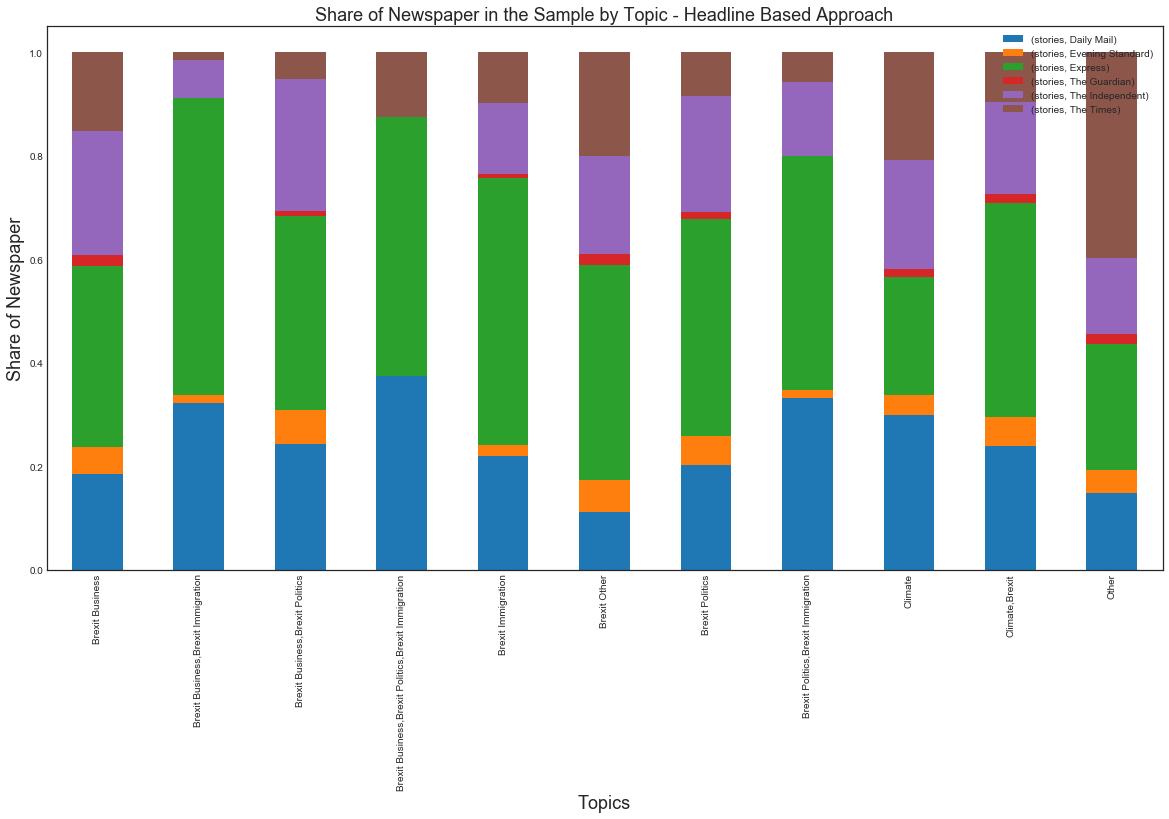

In [443]:
tps = stats_df_head.pivot_table(values=['stories'], 
                      index='headline_classification',
                      columns='newspaper',
                      aggfunc='sum')
plt.rcParams["figure.figsize"] = (20,10)
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
plt.legend(loc="upper right")
plt.ylabel('Share of Newspaper', fontsize=18)
plt.title('Share of Newspaper in the Sample by Topic - Headline Based Approach', fontsize=18)
plt.xlabel("Topics", fontsize=18)

In [444]:
# stories per date and topic
stats_df_head_all.head()

,date1,headline_classification,stories,total_stories
date,,,,
1-3-2015,01mar2015,Brexit Other,1,22
1-3-2015,01mar2015,Climate,7,22
1-3-2015,01mar2015,Other,14,22
2-3-2015,02mar2015,Brexit Immigration,1,36
2-3-2015,02mar2015,Brexit Other,4,36


In [445]:
# make a month column to preserve the order
stats_df_head_all['month_year'] = pd.to_datetime(stats_df_head_all['date1']).dt.strftime('%m%y')

stats_df_head_all.set_index(['headline_classification', 'month_year'], inplace=True)

In [446]:
stats_df_head_all.head()

,,date1,stories,total_stories
headline_classification,month_year,,,
Brexit Other,0315,01mar2015,1,22
Climate,0315,01mar2015,7,22
Other,0315,01mar2015,14,22
Brexit Immigration,0315,02mar2015,1,36
Brexit Other,0315,02mar2015,4,36


In [447]:
del stats_df_head_all['date1'] 
del stats_df_head_all['total_stories']

In [448]:
df_pivot = stats_df_head_all.reset_index()
df_pivot = df_pivot.pivot_table(index='month_year', columns='headline_classification', values='stories', aggfunc='sum')
df_pivot.sort_index(0)
df_pivot.head()

headline_classification,Brexit Business,"Brexit Business,Brexit Immigration","Brexit Business,Brexit Politics","Brexit Business,Brexit Politics,Brexit Immigration",Brexit Immigration,Brexit Other,Brexit Politics,"Brexit Politics,Brexit Immigration",Climate,"Climate,Brexit",Other
month_year,,,,,,,,,,,
0116,23.0,5.0,5.0,3.0,36.0,194.0,79.0,12.0,313.0,32.0,1248.0
0117,168.0,2.0,39.0,NaN,19.0,674.0,346.0,7.0,795.0,278.0,1188.0
0216,44.0,7.0,9.0,2.0,30.0,404.0,148.0,4.0,300.0,97.0,1241.0
0217,117.0,1.0,32.0,1.0,24.0,620.0,338.0,7.0,707.0,167.0,1173.0
0315,6.0,1.0,4.0,NaN,9.0,52.0,18.0,1.0,188.0,7.0,613.0


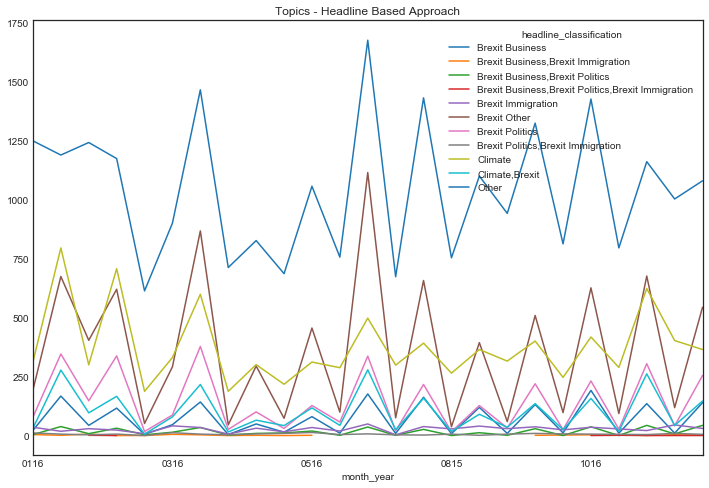

In [449]:
df_pivot.plot(figsize=(12, 8), title='Topics - Headline Based Approach');

# Show y-axis in 'plain' format instead of 'scientific'
plt.ticklabel_format(style='scientific', axis='y')

# NEED TO FIX THE STARTING DATE OF X-AXIS

In [450]:
#table_daily = pd.pivot_table(stats_df_head_all, index='date1', columns='headline_classification', values='stories', fill_value=0)
#table_daily.head()

# make a month column to preserve the order
#stats_df_head_all['month_year'] = pd.to_datetime(stats_df_head_all['date1']).dt.strftime('%m%y')
# create the pivot table with this numeric month column
#df_pivot = pd.pivot_table(stats_df_head_all, index='month_year',columns=['headline_classification'],aggfunc=sum, fill_value=0).T
# create a mapping between numeric months and the English version
#mapping = pd.Series(stats_df_head_all.index.tolist(),index=stats_df_head_all.month.values).drop_duplicates()
#df_pivot.head()

#grouped = df_pivot.groupby('headline_classification')
#for key, group in grouped:
 #   plt.plot(group.month_year, group.stories, label=key)
#plt.legend();

In [451]:
stats_df_head_all.head()

,,stories
headline_classification,month_year,
Brexit Other,0315,1
Climate,0315,7
Other,0315,14
Brexit Immigration,0315,1
Brexit Other,0315,4


In [452]:
#stats_df_head_all.date1 = pd.to_datetime(stats_df_head_all.date1)
#stats_df_head_all.set_index(['date1', 'headline_classification'], inplace=True)

In [453]:
#stats_df_text

Text(0.5, 0, 'Topics')

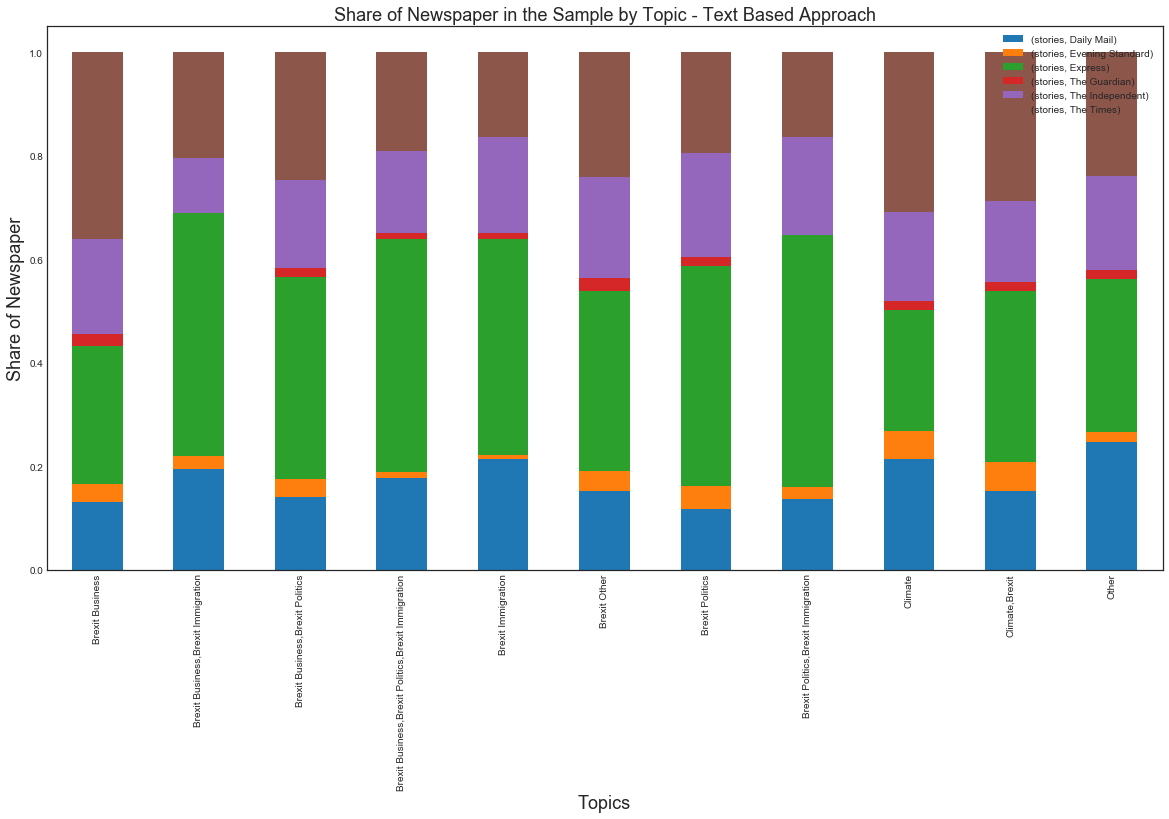

In [454]:
tps2 = stats_df_text.pivot_table(values=['stories'], 
                      index='text_classification',
                      columns='newspaper',
                      aggfunc='sum')
plt.rcParams["figure.figsize"] = (20,10)
tps2 = tps2.div(tps2.sum(1), axis=0)
tps2.plot(kind='bar', stacked=True)
plt.legend(loc="upper right")
plt.ylabel('Share of Newspaper', fontsize=18)
plt.title('Share of Newspaper in the Sample by Topic - Text Based Approach', fontsize=18)
plt.xlabel("Topics", fontsize=18)

In [455]:
stats_df_head_all.head()

,,stories
headline_classification,month_year,
Brexit Other,0315,1
Climate,0315,7
Other,0315,14
Brexit Immigration,0315,1
Brexit Other,0315,4


In [456]:
# make a month column to preserve the order
stats_df_text_all['month_year'] = pd.to_datetime(stats_df_text_all['date1']).dt.strftime('%m%y')

stats_df_text_all.set_index(['text_classification', 'month_year'], inplace=True)

In [457]:
stats_df_text_all.head()

,,date1,stories,total_stories
text_classification,month_year,,,
Brexit Politics,0315,01mar2015,1,22
Climate,0315,01mar2015,16,22
"Climate,Brexit",0315,01mar2015,1,22
Other,0315,01mar2015,4,22
Brexit Business,0315,02mar2015,3,36


In [458]:
del stats_df_text_all['date1'] 
del stats_df_text_all['total_stories']

In [460]:
df_pivot_text = stats_df_text_all.reset_index()
df_pivot_text = df_pivot_text.pivot_table(index='month_year', columns='text_classification', values='stories', aggfunc='sum')
df_pivot_text.sort_index(0)
df_pivot_text.head()

text_classification,Brexit Business,"Brexit Business,Brexit Immigration","Brexit Business,Brexit Politics","Brexit Business,Brexit Politics,Brexit Immigration",Brexit Immigration,Brexit Other,Brexit Politics,"Brexit Politics,Brexit Immigration",Climate,"Climate,Brexit",Other
month_year,,,,,,,,,,,
0116,69.0,8.0,54.0,3.0,33.0,26.0,170.0,8.0,1071.0,282.0,226.0
0117,249.0,2.0,167.0,7.0,14.0,52.0,654.0,10.0,1497.0,682.0,182.0
0216,114.0,11.0,66.0,11.0,27.0,40.0,365.0,29.0,988.0,427.0,208.0
0217,221.0,3.0,136.0,6.0,17.0,74.0,627.0,11.0,1321.0,606.0,165.0
0315,25.0,NaN,11.0,2.0,5.0,13.0,54.0,3.0,593.0,101.0,92.0


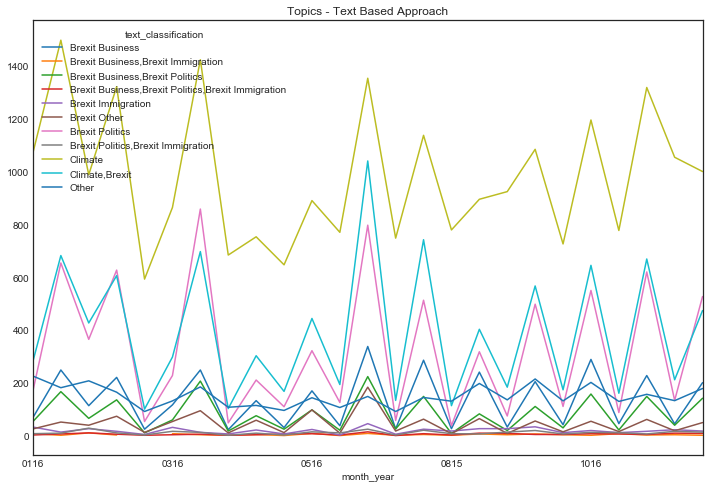

In [463]:
df_pivot_text.plot(figsize=(12, 8), title='Topics - Text Based Approach');

# Show y-axis in 'plain' format instead of 'scientific'
plt.ticklabel_format(style='scientific', axis='y')

# NEED TO FIX THE STARTING DATE OF X-AXIS

In [464]:
stats_df_text_all.head()

,,stories
text_classification,month_year,
Brexit Politics,0315,1
Climate,0315,16
"Climate,Brexit",0315,1
Other,0315,4
Brexit Business,0315,3


NOTE: SIMILAR GRAPHS COULD BE MADE FOR POLARITY SCORES